# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

# Challenge 1 - Independent Sample T-tests

In this challenge, we will be using the Pokemon dataset. Before applying statistical methods to this data, let's first examine the data.

To load the data, run the code below.

In [2]:
# Run this code:

pokemon = pd.read_csv('../pokemon.csv')

Let's start off by looking at the `head` function in the cell below.

In [3]:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


The first thing we would like to do is compare the legendary Pokemon to the regular Pokemon. To do this, we should examine the data further. What is the count of legendary vs. non legendary Pokemons?

In [5]:
pokemon.Legendary.value_counts()

False    735
True      65
Name: Legendary, dtype: int64

Compute the mean and standard deviation of the total points for both legendary and non-legendary Pokemon.

In [6]:
leg = pokemon[pokemon.Legendary]
norm = pokemon[~pokemon.Legendary]

In [7]:
leg['Total'].mean(), leg['Total'].std()

(637.3846153846154, 60.93738905315346)

In [8]:
norm['Total'].mean(), norm['Total'].std()

(417.21360544217686, 106.76041745713022)

The computation of the mean might give us a clue regarding how the statistical test may turn out; However, it certainly does not prove whether there is a significant difference between the two groups.

In the cell below, use the `ttest_ind` function in `scipy.stats` to compare the the total points for legendary and non-legendary Pokemon. Since we do not have any information about the population, assume the variances are not equal.

In [28]:
from scipy.stats import ttest_ind, ttest_rel

ttest_ind(leg['Total'],norm['Total'], equal_var = False).pvalue 

9.357954335957446e-47

What do you conclude from this test? Write your conclusions below.

+ There is a significant difference between legendary and non-legendary pokemon, as the pvalue is very little which rules out the H0 hypothesis that there is not.

How about we try to compare the different types of pokemon? In the cell below, list the types of Pokemon from column `Type 1` and the count of each type.

In [10]:
pokemon['Type 1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

Since water is the largest group of Pokemon, compare the mean and standard deviation of water Pokemon to all other Pokemon.

In [11]:
compare = pd.DataFrame([pokemon.groupby('Type 1').mean()['Total'], pokemon.groupby('Type 1').std()['Total']]).T

compare

,Total,Total
Type 1,,
Bug,378.927536,117.875223
Dark,445.741935,109.126217
Dragon,550.531250,146.267538
Electric,443.409091,105.721952
Fairy,413.176471,123.781680
Fighting,416.444444,102.464378
Fire,458.076923,109.760496
Flying,485.000000,161.400124
Ghost,439.562500,110.072685


In [12]:
compare.columns = ['Mean','Std']
compare['diff_water_mean'] = abs(compare.Mean - compare.Mean.loc['Water'])

compare

,Mean,Std,diff_water_mean
Type 1,,,
Bug,378.927536,117.875223,51.527821
Dark,445.741935,109.126217,15.286578
Dragon,550.531250,146.267538,120.075893
Electric,443.409091,105.721952,12.953734
Fairy,413.176471,123.781680,17.278887
Fighting,416.444444,102.464378,14.010913
Fire,458.076923,109.760496,27.621566
Flying,485.000000,161.400124,54.544643
Ghost,439.562500,110.072685,9.107143


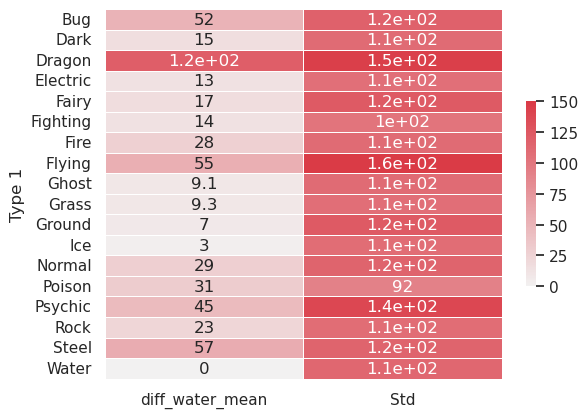

In [13]:
sns.set(style = 'dark')
cmap = sns.diverging_palette(0, 10, as_cmap = True) 
sns.heatmap(compare[['diff_water_mean','Std']], 
            cmap = cmap,
            vmax = 150,
            vmin = 0,
            center = 0,
            square = False,
            linewidth = 0.5,
            cbar_kws = {'shrink': 0.5},
            annot = True
           )

plt.rcParams['figure.figsize'] = (4, 6); # Hay varias diferencias que podrían ser muy significativas.

Perform a hypothesis test comparing the mean of total points for water Pokemon to all non-water Pokemon. Assume the variances are equal. 

In [14]:
# Your code here:

test = {}

for i in pokemon['Type 1'].unique():
    if i != 'Water':
        test[i+' - '+'Water'] = ttest_ind(pokemon[pokemon['Type 1'] == i]['Total'],
                                            pokemon[pokemon['Type 1'] == 'Water']['Total']).pvalue

test

{'Grass - Water': 0.581639254174863,
 'Fire - Water': 0.1440191557485167,
 'Bug - Water': 0.0038548781665409104,
 'Normal - Water': 0.07042188260586342,
 'Poison - Water': 0.1778452340691479,
 'Electric - Water': 0.5134433259970335,
 'Ground - Water': 0.7615857927492209,
 'Fairy - Water': 0.5633643398463386,
 'Fighting - Water': 0.5578259589757799,
 'Psychic - Water': 0.023680970625352817,
 'Rock - Water': 0.24328992443308184,
 'Ghost - Water': 0.6869629027430053,
 'Ice - Water': 0.9055978314393027,
 'Dragon - Water': 2.1352166466685194e-06,
 'Dark - Water': 0.5036228889206,
 'Steel - Water': 0.020189304895386166,
 'Flying - Water': 0.35207044547962285}

Write your conclusion below.

In [15]:
# Let's check which ones are less than 0.05 to see if there is significant difference between types:

check = {}

for i in test.keys():
    if test[i] < 0.05:
        check[i] = True
        
check # Estos son los pokemon en los que hay una diferencia significativa con el tipo agua, al 95% de confianza

{'Bug - Water': True,
 'Psychic - Water': True,
 'Dragon - Water': True,
 'Steel - Water': True}

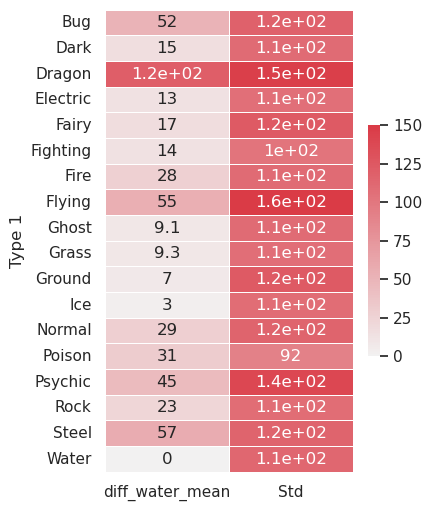

In [16]:
# Echemos un ojo al tanteo inicial que hicimos:

sns.set(style = 'dark')
cmap = sns.diverging_palette(0, 10, as_cmap = True) 
sns.heatmap(compare[['diff_water_mean','Std']], 
            cmap = cmap,
            vmax = 150,
            vmin = 0,
            center = 0,
            square = False,
            linewidth = 0.5,
            cbar_kws = {'shrink': 0.5},
            annot = True
           )

plt.rcParams['figure.figsize'] = (4, 6); 

In [17]:
# ¡Qué interesante! Observamos que la mayoría de los sospechosos son efectivamente distintos según el test, 
# pero los de tipo 'Flying', por ejemplo, no lo son realmente. Si nos fijamos, su desviación típica es 
# más grande que las del resto, lo que convierte en acertada la decisión de realizar el test.

# Challenge 2 - Matched Pairs Test

In this challenge we will compare dependent samples of data describing our Pokemon. Our goal is to see whether there is a significant difference between each Pokemon's defense and attack scores. Our hypothesis is that the defense and attack scores are equal. In the cell below, import the `ttest_rel` function from `scipy.stats` and compare the two columns to see if there is a statistically significant difference between them.

In [26]:
# Ya hice este bonus, así que voy a copiar la función:

def t_test_same(s, features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Total']):
    
    results = {}
    
    for i in range(len(features)):
        for j in range(i+1,len(features)):
            results[features[i] + ' - ' + features[j]] = ttest_rel(s[features[i]], s[features[j]]).pvalue 
            # They are dependent sets of data
    
    return results

Describe the results of the test in the cell below.

In [30]:
dictio = t_test_same(pokemon, features = ['Attack','Defense'])

dictio # There are indeed significant differences among these values

{'Attack - Defense': 1.7140303479358558e-05}

We are also curious about whether therer is a significant difference between the mean of special defense and the mean of special attack. Perform the hypothesis test in the cell below. 

Describe the results of the test in the cell below.

In [32]:
dictio = t_test_same(pokemon, features = ['Sp. Atk','Sp. Def'])

dictio # There are not among these others

{'Sp. Atk - Sp. Def': 0.3933685997548122}

As you may recall, a two sample matched pairs test can also be expressed as a one sample test of the difference between the two dependent columns.

Import the `ttest_1samp` function and perform a one sample t-test of the difference between defense and attack. Test the hypothesis that the difference between the means is zero. Confirm that the results of the test are the same.

In [33]:
from scipy.stats import ttest_1samp

t_test = ttest_1samp(pokemon.Attack-pokemon.Defense, 0, alternative = 'two-sided')

t_test.pvalue < 0.05 # 95% de confianza

True

In [ ]:
# Efectiviwonder, hay diferencia significativa.

# Bonus Challenge - The Chi-Square Test

The Chi-Square test is used to determine whether there is a statistically significant difference in frequencies. In other words, we are testing whether there is a relationship between categorical variables or rather when the variables are independent. This test is an alternative to Fisher's exact test and is used in scenarios where sample sizes are larger. However, with a large enough sample size, both tests produce similar results. Read more about the Chi Squared test [here](https://en.wikipedia.org/wiki/Chi-squared_test).

In the cell below, create a contingency table using `pd.crosstab` comparing whether a Pokemon is legenadary or not and whether the Type 1 of a Pokemon is water or not.

In [39]:
crossy = pd.crosstab(pokemon['Legendary'], pokemon['Type 1']  == 'Water')

crossy

Type 1,False,True
Legendary,,
False,627,108
True,61,4


Perform a chi-squared test using the `chi2_contingency` function in `scipy.stats`. You can read the documentation of the function [here](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.chi2_contingency.html).

In [41]:
from scipy.stats import chi2_contingency

chi2_contingency(crossy).pvalue

0.08625467249550949

Based on a 95% confidence, should we reject the null hypothesis?

In [25]:
# Not really.. the pvalue is higher, so we cannot assure the variables are dependent. 